<a href="https://colab.research.google.com/github/hesolar/TrabajoDistribuidos2020solar-escudero/blob/master/hashing_search_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descargamos los modelos para la detección de caras

In [13]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
!wget https://www.dropbox.com/s/uji1ufb009ic3m0/mobilenet_graph.pb?dl=0 -O mobilenet_graph.pb
# Leer mobilenet_graph.pb
with tf.io.gfile.GFile('mobilenet_graph.pb','rb') as f:
    graph_def = tf.compat.v1.GraphDef()
    graph_def.ParseFromString(f.read())

with tf.Graph().as_default() as mobilenet:
    tf.import_graph_def(graph_def,name='')

--2021-05-25 11:26:51--  https://www.dropbox.com/s/uji1ufb009ic3m0/mobilenet_graph.pb?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/uji1ufb009ic3m0/mobilenet_graph.pb [following]
--2021-05-25 11:26:51--  https://www.dropbox.com/s/raw/uji1ufb009ic3m0/mobilenet_graph.pb
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc34929af2f48dc266cf272da89a.dl.dropboxusercontent.com/cd/0/inline/BPJEqC-thlnDGVvMNgDa3Ab84BvhHmertVRweqfHqyqj5FqWfxbiSgd4TeGVr9xQyMTylIqHZs4skLF0eHgSZWiTe3ucLvAtDqmNyvMV3Vfyd0cgcoxcCtJO685cL0spN19bbN4rpFulDvvJ6z3l9k1z/file# [following]
--2021-05-25 11:26:51--  https://uc34929af2f48dc266cf272da89a.dl.dropboxusercontent.com/cd/0/inline/BPJEqC-thlnDGVvMNgDa3Ab84BvhHmertVRweqfHqyqj5FqWfxbiSgd4TeGVr9xQyMT

In [14]:
def detect_faces(image, score_threshold=0.7):
    global boxes, scores
    (imh, imw) = image.shape[:-1]
    img = np.expand_dims(image,axis=0)
    
    # Inicializar mobilenet
    sess = tf.compat.v1.Session(graph=mobilenet)
    image_tensor = mobilenet.get_tensor_by_name('image_tensor:0')
    boxes = mobilenet.get_tensor_by_name('detection_boxes:0')
    scores = mobilenet.get_tensor_by_name('detection_scores:0')
    
    # Predicción (detección)
    (boxes, scores) = sess.run([boxes, scores], feed_dict={image_tensor:img})
    
    # Reajustar tamaños boxes, scores
    boxes = np.squeeze(boxes,axis=0)
    scores = np.squeeze(scores,axis=0)
    
    # Depurar bounding boxes
    idx = np.where(scores>=score_threshold)[0]
    
    # Crear bounding boxes
    bboxes = []
    for index in idx:
        ymin, xmin, ymax, xmax = boxes[index,:]
        (left, right, top, bottom) = (xmin*imw, xmax*imw, ymin*imh, ymax*imh)
        left, right, top, bottom = int(left), int(right), int(top), int(bottom)
        bboxes.append([left,right,top,bottom])
        
    return bboxes

In [71]:
from google.colab.patches import cv2_imshow
dir='hashing-search-engine/2'
def load_image(DIR, NAME):
    return cv2.cvtColor(cv2.imread(f'{DIR}/{name}'), cv2.COLOR_BGR2RGB)

# image = load_image(dir,name)
# for i in range(0,10):
#   s=os.listdir(dir)[i]
#   # s=dir+s
#   image=cv2.imread(s)
#   plt.imshow(image)

#   print(s)
# Displaying the image 
# cv2.imshow(window_name, image)
cont=0
listaCaras={}
for name in os.listdir(dir):
  if name.endswith('.jpg'):
    if cont==10:
      break
    print(f'   {name}')
    # try:
    image = load_image(dir,name)
    bboxes=detect_faces(image)
    if len(bboxes)>0:
      
      faces = extract_faces(image,bboxes)
      listaCaras[name]=faces
    # except:
          # print("An exception occurred")
  cont=cont+1

   449668.jpg
   28885.jpg
   1937.jpg
   469132.jpg
   452415.jpg
   443572.jpg
   581.jpg
   453053.jpg
   43625.jpg
   242.jpg


In [70]:
def extract_faces(image,bboxes,new_size=(160,160)):
    cropped_faces = []
    for box in bboxes:
        left, right, top, bottom = box
        face = image[top:bottom,left:right]
        cropped_faces.append(cv2.resize(face,dsize=new_size))
    return cropped_faces

449668.jpg
28885.jpg
1937.jpg
469132.jpg
452415.jpg
443572.jpg
581.jpg
453053.jpg
43625.jpg


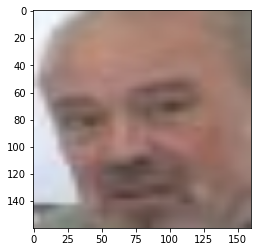

In [72]:
for name in listaCaras:
  print(name)
  b=listaCaras[name]
  for el in b:
    plt.imshow(el)
  # for box in bboxes:


In [1]:
!pip install opencv-contrib-python
!pip install vptree

### Download the code zip file

In [2]:
!wget https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/image-hashing-search-engine/hashing-search-engine.zip
!unzip -qq hashing-search-engine.zip
%cd hashing-search-engine

--2021-05-25 11:19:35--  https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/image-hashing-search-engine/hashing-search-engine.zip
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.153.64
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.153.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113505 (111K) [application/zip]
Saving to: ‘hashing-search-engine.zip.1’

hashing-search-engi 100%[===================>] 110.84K   446KB/s    in 0.2s    

2021-05-25 11:19:36 (446 KB/s) - ‘hashing-search-engine.zip.1’ saved [113505/113505]

replace hashing-search-engine/index_images.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
/content/hashing-search-engine


Dataset del gobierno de la rioja

In [ ]:
!wget https://www.dropbox.com/s/chfwr4x475y3p1v/noticiasFotos.zip?dl=0 -O 2.zip
!unzip 2.zip

## Blog Post Code

### Import Packages

In [17]:
# import the necessary packages
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import pickle
import vptree
import time
import cv2
import os

### Function to display images in Jupyter Notebooks and Google Colab

In [5]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Implementing our image hashing utilities

In [6]:
def dhash(image, hashSize=8):
	# convert the image to grayscale
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	
	# resize the input image, adding a single column (width) so we
	# can compute the horizontal gradient
	resized = cv2.resize(gray, (hashSize + 1, hashSize))

	# compute the (relative) horizontal gradient between adjacent
	# column pixels
	diff = resized[:, 1:] > resized[:, :-1]

	# convert the difference image to a hash
	return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])

In [7]:
def convert_hash(h):
	# convert the hash to NumPy's 64-bit float and then back to
	# Python's built in int
	return int(np.array(h, dtype="float64"))

In [8]:
def hamming(a, b):
	# compute and return the Hamming distance between the integers
	return bin(int(a) ^ int(b)).count("1")

### Implementing our image hash indexer

In [9]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--images", required=True, type=str,
# 	help="path to input directory of images")
# ap.add_argument("-t", "--tree", required=True, type=str,
# 	help="path to output VP-Tree")
# ap.add_argument("-a", "--hashes", required=True, type=str,
# 	help="path to output hashes dictionary")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "images": "2",
    "tree": "vptree.pickle",
    "hashes": "hashes.pickle"
}

In [10]:
# grab the paths to the input images and initialize the dictionary
# of hashes
imagePaths = list(paths.list_images(args["images"]))
hashes = {}

# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
	# load the input image
  try:
    print("[INFO] processing image {}/{}".format(i + 1,
      len(imagePaths)))
    image = cv2.imread(imagePath)

    # compute the hash for the image and convert it
    h = dhash(image)
    h = convert_hash(h)

    # update the hashes dictionary
    l = hashes.get(h, [])
    l.append(imagePath)
    hashes[h] = l
  except:
    print('error')

Se han truncado las últimas 5000 líneas del flujo de salida.
[INFO] processing image 19179/21678
error
[INFO] processing image 19180/21678
error
[INFO] processing image 19181/21678
error
[INFO] processing image 19182/21678
error
[INFO] processing image 19183/21678
error
[INFO] processing image 19184/21678
error
[INFO] processing image 19185/21678
error
[INFO] processing image 19186/21678
error
[INFO] processing image 19187/21678
error
[INFO] processing image 19188/21678
error
[INFO] processing image 19189/21678
error
[INFO] processing image 19190/21678
error
[INFO] processing image 19191/21678
error
[INFO] processing image 19192/21678
error
[INFO] processing image 19193/21678
error
[INFO] processing image 19194/21678
error
[INFO] processing image 19195/21678
error
[INFO] processing image 19196/21678
error
[INFO] processing image 19197/21678
error
[INFO] processing image 19198/21678
error
[INFO] processing image 19199/21678
error
[INFO] processing image 19200/21678
error
[INFO] processi

In [11]:
# build the VP-Tree
print("[INFO] building VP-Tree...")
points = list(hashes.keys())
tree = vptree.VPTree(points, hamming)

[INFO] building VP-Tree...


ValueError: ignored

In [ ]:
# serialize the VP-Tree to disk
print("[INFO] serializing VP-Tree...")
f = open(args["tree"], "wb")
f.write(pickle.dumps(tree))
f.close()

# serialize the hashes to dictionary
print("[INFO] serializing hashes...")
f = open(args["hashes"], "wb")
f.write(pickle.dumps(hashes))
f.close()

### Implementing our image hash searching script

In [ ]:
# construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-t", "--tree", required=True, type=str,
# 	help="path to pre-constructed VP-Tree")
# ap.add_argument("-a", "--hashes", required=True, type=str,
# 	help="path to hashes dictionary")
# ap.add_argument("-q", "--query", required=True, type=str,
# 	help="path to input query image")
# ap.add_argument("-d", "--distance", type=int, default=10,
# 	help="maximum hamming distance")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "tree": "vptree.pickle",
    "hashes": "hashes.pickle",
    "query": "queries/acordion.jpg",
    "distance": 10
}

In [ ]:
# import the necessary packages
from imutils import paths
import argparse
import time
import sys
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [ ]:
# load the VP-Tree and hashes dictionary
print("[INFO] loading VP-Tree and hashes...")
tree = pickle.loads(open(args["tree"], "rb").read())
hashes = pickle.loads(open(args["hashes"], "rb").read())

# load the input query image
image = cv2.imread('/content/hashing-search-engine/queries/a.jpg')
plt_imshow("Query", image)




# compute the hash for the query image, then convert it
queryHash = dhash(image)
print('HASH:')
print(queryHash)
queryHash = convert_hash(queryHash)

In [ ]:
# perform the search
print("[INFO] performing search...")
start = time.time()
results = tree.get_all_in_range(queryHash, args["distance"])
results = sorted(results)
end = time.time()
print("[INFO] search took {} seconds".format(end - start))

In [ ]:
results

In [ ]:
# loop over the results
for (d, h) in results:
	# grab all image paths in our dataset with the same hash
	resultPaths = hashes.get(h, [])
	print("[INFO] {} total image(s) with d: {}, h: {}".format(
		len(resultPaths), d, h))

	# loop over the result paths
	for resultPath in resultPaths:
		# load the result image and display it to our screen
		result = cv2.imread(resultPath)
		plt_imshow("Result", result)

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*Building an Image Hashing Search Engine with VP-Trees and OpenCV*](https://www.pyimagesearch.com/2019/08/26/building-an-image-hashing-search-engine-with-vp-trees-and-opencv/) blog post published on 2019-08-26.

# Code License Agreement
```
Copyright (c) 2020 PyImageSearch.com

SIMPLE VERSION
Feel free to use this code for your own projects, whether they are
purely educational, for fun, or for profit. THE EXCEPTION BEING if
you are developing a course, book, or other educational product.
Under *NO CIRCUMSTANCE* may you use this code for your own paid
educational or self-promotional ventures without written consent
from Adrian Rosebrock and PyImageSearch.com.

LONGER, FORMAL VERSION
Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software,
and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.
Notwithstanding the foregoing, you may not use, copy, modify, merge,
publish, distribute, sublicense, create a derivative work, and/or
sell copies of the Software in any work that is designed, intended,
or marketed for pedagogical or instructional purposes related to
programming, coding, application development, or information
technology. Permission for such use, copying, modification, and
merger, publication, distribution, sub-licensing, creation of
derivative works, or sale is expressly withheld.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS
BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN
ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```